<a href="https://colab.research.google.com/github/pmilks/cap-comp215/blob/main/MATH336_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

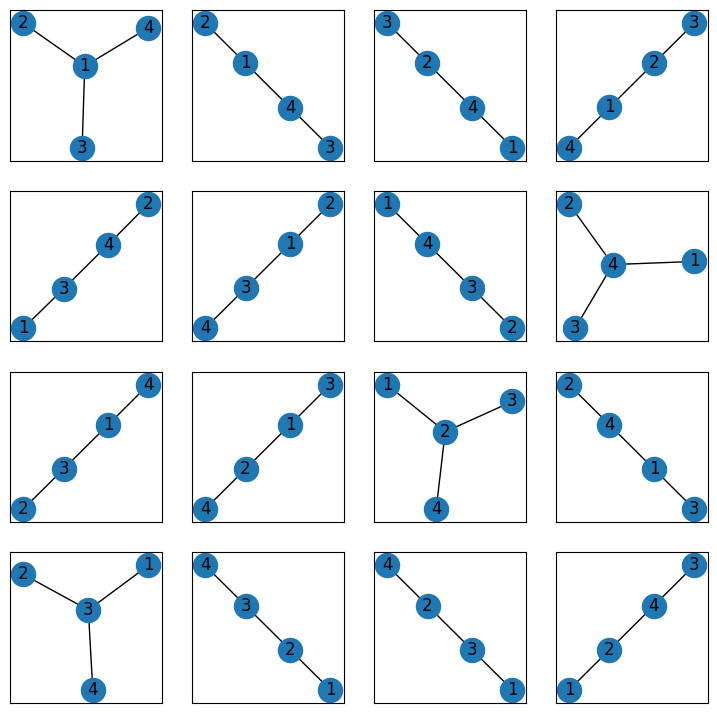

In [44]:
import matplotlib.pyplot as plt
import networkx as nx
import random  # https://python.readthedocs.io/en/stable/library/random.html

def random_new_int(num_nodes, node_list):

    while True:

        random_integer = random.randint(2, num_nodes)

        if random_integer not in node_list:

            break

    return random_integer


def random_tree(vertices):
    G = nx.Graph()
    G.add_node(1)
    if vertices > 1:
        for i in range(2,vertices+1):
          str_node = random.choice(list(G.nodes()))
          new_node = random_new_int(vertices, list(G.nodes()))
          G.add_node(new_node)
          G.add_edge(new_node,str_node)

    return G


def all_trees(vertices):

    trees = [random_tree(vertices)]  # first tree in a list of trees

    while len(trees) < vertices**(vertices-2):

        new_tree = random_tree(vertices)

        for t in trees:

            is_distinct_tree = True  # assume true

            if new_tree.edges() - t.edges() == set():

                is_distinct_tree = False  # change to false if identical
                break

        if is_distinct_tree: trees.append(new_tree)

    return trees

trees = all_trees(4)

fig, all_axes = plt.subplots(4, 4, figsize=(9,9))
ax = all_axes.flat

for count, tree in enumerate(trees):

    nx.draw_networkx(tree, ax=ax[count], with_labels=True)

{2: 6, 1: 5, 3: 2, 6: 4, 4: 1, 5: 3}, True


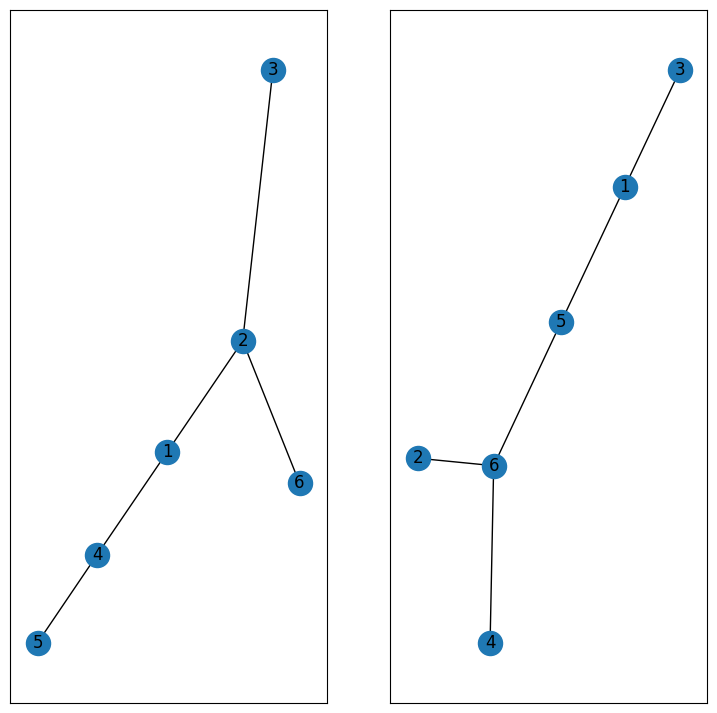

In [36]:
fig, all_axes = plt.subplots(1, 2, figsize=(9,9))
ax = all_axes.flat

tree_1 = random_tree(6)
tree_2 = random_tree(6)
nx.draw_networkx(tree_1, ax=ax[0], with_labels=True)
nx.draw_networkx(tree_2, ax=ax[1], with_labels=True)

print(f'{nx.vf2pp_isomorphism(tree_1,tree_2)}, {nx.vf2pp_is_isomorphic(tree_1,tree_2)}')

In [ ]:
def find_distinct_trees(tree_list):
  distinct_trees = []
  for i in range(len(tree_list)):
    is_distinct = True
    for j in range(i+1, len(tree_list)):
      if nx.vf2pp_is_isomorphic(tree_list[i],tree_list[j]):
        is_distinct = False
    if is_distinct:
      distinct_trees.append(tree_list[i])
  return distinct_trees

fig, all_axes = plt.subplots(4, 4, figsize=(9,9))
ax = all_axes.flat

for count, tree in enumerate(find_distinct_trees(all_trees(6))):
    nx.draw_networkx(tree, ax=ax[count], with_labels=False)